In [1]:
## REvannath , KNN  for Zoo assignment 

In [2]:
## import the required libraries 

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [8]:
zoo= pd.read_csv('C:/Users/hp/Desktop/Revannath Data Sci/Assignments/13-KNN/Zoo.csv')

In [9]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [10]:
knn_zoo = zoo.iloc[:,1:]

In [11]:
knn_zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
## removing Unwanted data

In [13]:
# split the data into train and test for the model building and testing purposes

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
zoo_train,zoo_test = train_test_split(knn_zoo,test_size = 0.2)

In [16]:
## now we are going use KNN

In [17]:
## first we need to import the KNN libries 

In [18]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [19]:
zoo.shape

(101, 18)

In [20]:
## checking for first 3 neighbours 

In [22]:
zoo_neighbors = KNC(n_neighbors= 3)

In [23]:
#fitting the zoo_neighbors with training data

In [24]:
zoo_neighbors.fit(zoo_train.iloc[:,0:16],zoo_train.iloc[:,16])

KNeighborsClassifier(n_neighbors=3)

In [25]:
## requesting train accuracy fun

In [26]:
train_accuracy = np.mean(zoo_neighbors.predict(zoo_train.iloc[:,0:16])==zoo_train.iloc[:,16])

In [27]:
train_accuracy

0.9625

In [28]:
## The train Accuracy is = 0.9625---96.25%

In [29]:
## Test Accuracy 

In [30]:
test_accuracy = np.mean(zoo_neighbors.predict(zoo_test.iloc[:,0:16])==zoo_test.iloc[:,16])

In [31]:
test_accuracy

0.9523809523809523

In [33]:
## The test accuracy is= 0.9523809523809523---95.23%%

In [34]:
accuracy = []

In [35]:
for i in range(3,50):
  zoo_neighbors = KNC(n_neighbors=i)
  zoo_neighbors.fit(zoo_train.iloc[:,0:16],zoo_train.iloc[:,16])
  train_accuracy = np.mean(zoo_neighbors.predict(zoo_train.iloc[:,0:16])==zoo_train.iloc[:,16])
  test_accuracy = np.mean(zoo_neighbors.predict(zoo_test.iloc[:,0:16])==zoo_test.iloc[:,16])
  accuracy.append([train_accuracy,test_accuracy])

In [36]:
import matplotlib.pyplot as plt  # Library for visualizatuon

In [37]:
## ploting for the both train and test accuracy 

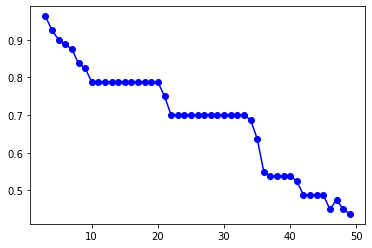

In [38]:
plt.plot(np.arange(3,50),[i[0] for i in accuracy],"bo-")

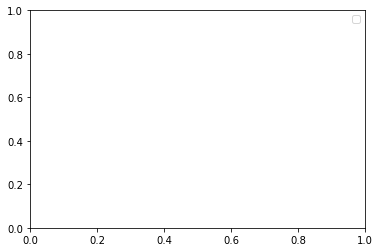

In [39]:
plt.legend(["zoo_train","zoo_test"])

In [40]:
plt.show()

In [41]:
# Testing accuracy plot

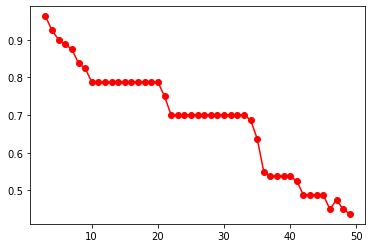

In [42]:
plt.plot(np.arange(3,50),[i[0] for i in accuracy],"ro-")

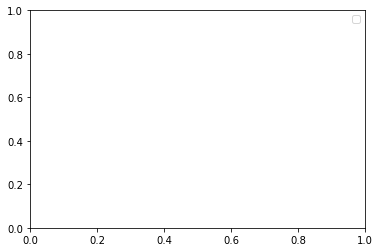

In [43]:
plt.legend(["zoo_train","zoo_test"])

In [ ]:
## now ew can decide the KNN value